## Predicting software engineers salaries

@ TODO

With the use of regression and classification with natural language processing to find any significant patterns





In [7]:
#import libraries 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical
import tensorflow as tf 
# import tflearn
from matplotlib.pyplot import figure

#Libraries for Random Forset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## Importing dataset [Random Forest]

In [8]:
#load the data into a Pandas dataframe
jobsRF=pd.read_csv('SE(madeup).csv')
#display the first 3 rows on train_features
print(jobsRF.info())
jobsRF.head(3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jobListingId                  30 non-null     int64  
 1   jobTitle                      30 non-null     object 
 2   jobCategory-FullTime          30 non-null     int64  
 3   jobRemote                     30 non-null     int64  
 4   kilometerDistanceFromCentral  30 non-null     float64
 5   Salary                        30 non-null     int64  
 6   EasyToApply                   30 non-null     int64  
 7   GraduateJob                   30 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.0+ KB
None


,jobListingId,jobTitle,jobCategory-FullTime,jobRemote,kilometerDistanceFromCentral,Salary,EasyToApply,GraduateJob
0,4209669018,Software Engineer,10132,0,2.766389,50561,0,1
1,4159125761,Embedded Software Engineer,10132,0,14.312570,58399,0,1
2,4201688830,Solutions Engineer,10146,0,2.766389,51464,1,0


In [9]:
df_all=jobsRF
jobsRF = jobsRF.select_dtypes(include=['int', 'float'])

In our first draft dataset there is 1 object features and 1 float feature and 6 int features some of them represented as booleans 1 being true and 0 being false. It uses data we collected from Glassdoors to calculate the distance from the capital and see if there is a correlation between that and salary. In this case our Salary field is made up since we were still exporing how to gather the data.

## Setting our X and y variables

In [10]:
#arry of our features
result = []
for x in jobsRF.columns:
    if x != 'Salary':
        result.append(x)

#define X and y variables
X = jobsRF[result].values
y = jobsRF['Salary'].values

## Split the data, and fit the model

In [11]:
#split data into testing and training with a 80 20 split of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Define our model and specify the hyperparamters and fit the model on training dataset
clf= RandomForestRegressor(n_estimators=15, max_depth=2, random_state=47, min_samples_split=4)
#fit the model
clf=clf.fit(X_train, y_train)
#check the score to see the level of acceptance of FP and FN.
print(clf.score(X_test, y_test))

-0.2455437816276782


## Make predictions

   Actual Salary  Predicted Salary
0          51464      41012.125328
1          45509      40721.945010
2          38776      41277.365380
3          36928      40085.537285
4          41624      46979.992857
5          39584      38350.149415


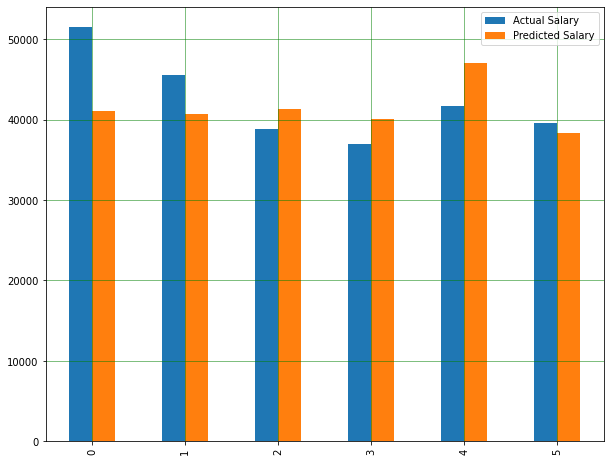

In [12]:
#make a prediction for our test dataset and assign it to the variable
y_pred = clf.predict(X_test)

#build a new data frame with two columns, the actual values of the test data,
#and the predictions of the model
#see our predicted value with the actual value
df_compare = pd.DataFrame({ 'Actual Salary': y_test, 'Predicted Salary': y_pred})
df_head = df_compare.head(25)
print(df_head)

df_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


## Analyze the model 

Mean: 42314.166666666664
Root Mean Squared Error: 5455.784344327331
Accuracy: 89.7 %.
-0.2455437816276782


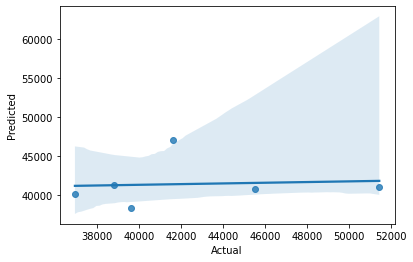

In [13]:
print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Performance metrics
errors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print(r2_score(y_test, y_pred))

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.regplot(x='Actual', y='Predicted', data=df_compare);
# plt.show()


This model had a hight accuracy but probaly is not very reliable and needs more testing and parameter tunnign. 

Therefore we have decided to look into Natural Lnaguage Processing on the second dataset that we managed to collect from Indeed website

## Importing dataset [Natural Language Processing]

In [14]:
#load the data into a Pandas dataframe
jobs=pd.read_csv('data.csv')
#display the first 3 rows on train_features
print(jobs.info())
jobs.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             495 non-null    object 
 1   Company           493 non-null    object 
 2   Links             500 non-null    object 
 3   Ratings           310 non-null    float64
 4   Address           494 non-null    object 
 5   Salary            103 non-null    object 
 6   Job description   494 non-null    object 
 7   full-description  500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB
None


,Title,Company,Links,Ratings,Address,Salary,Job description,full-description
0,Software Engineer Degree Apprentice,Blue Engineering,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN,London N1 6NU,"£16,000 a year",We are seeking a full-time software engineer a...,Software Engineer Degree Apprentice\nSalary: £...
1,Software Engineering Apprenticeship Registrati...,MI5,https://uk.indeed.com/rc/clk?jk=23e818204b884a...,NaN,London,NaN,On this Software Engineering Apprenticeship Yo...,On this Software Engineering Apprenticeship\n\...
2,Software Engineer Apprentice,Lloyds Banking Group,https://uk.indeed.com/rc/clk?jk=52b45930987414...,3.8,Bristol,"£27,540 - £32,130 a year",Build simple data models and software designs....,"Please note, this site is only for external ca..."


In our dataset there are 7 object features and 1 float feature. And later one we will create an integer column for average salary. The features Links will be used to fetch the full job description using Selenium. We will be looking at some dataset we collected from Glassdoors to calculate the distance from the capital and see if there is a correlation between that and salary. 

@Todo

## Predicting how much of a significance job experience/description has on salary 
Many job postings that we gathered for our dataset had unique job titles. While scraping for Software Engineer jobs in the United Kingdom. We scraped over 1000 jobs. 
The most obvious roles that suggested level of experience were 'Junior', 'Graduate', 'Senior'. 
Another aspect of job titles that we expected might have an impact on the salary were specific role specializations/areas such as 'Frontend', and 'Backend' engineers. These along with the description were natural language aspects that we wanted to build a model for using AI to see whether we could accurately predict/estimate a salary.

# Preparing salary data


Salary data that we had explored was presented in a variety of formats, ie; most commonly annual salary, monthly, daily and hourly wage.

_After reviewing the various data and despite coming up with a method to successfully convert salary data to a single format, we decided to simply filter out data not in the annual salary format. This could be easily adjusted and changed in a future version of the process.
This should be kept in mind as the dataset and thus the resulting training will be different than if sample data had the other formats included._

- Removed duplicate rows.
- Removed rows with any elements null/missing

We then convert the string salary values to numerical format and in the case of a range (indicated by a present '-' character in the string) we also calculate the average from the range to pass on.

In [15]:
testing_set = jobs[jobs['Salary'].isnull()]

def string_to_salary(x):
    #check if the salary is already correctly formatted
    if type(x) == int:
        return x
        
    # check for range and 
    if '-' in str(x):
        # remove currency symbols and commas from string 
        x = re.sub(r"[$£,]", '', x)
        #find only the numbers
        ns = re.findall('[\d,]+', x)
        ns_sum = 0
        for n in ns:
            #sum the salary range values
            ns_sum += int(n)
        #return average of salary range
        return (ns_sum/len(ns))
    else:
        # same as before case, remove unnecessary symbols and get numerical value
        x = re.sub(r"[$£,]", '', x)
        n = re.findall('[\d,]+', x)
        return float(n[0])

# drop rows with missing elements and drop duplicates
jobs.dropna(inplace=True)
jobs.drop_duplicates()
#filter for job listing only containing salaries in year format/containing 'year' in salary field    
jobs = jobs[jobs.Salary.str.contains("year") == True]

#call the string_to_salary method to map actual numerical values to real_salary column in jobs dataframe
jobs['real_salary'] = jobs['Salary'].map(string_to_salary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Salary by title 

@TODO

In [16]:

#(DATAFRAME COMPARE)
df_compare = pd.DataFrame({'Job Title':jobs['Title'],'Actual':jobs['Salary'], 'Average': jobs['real_salary']})
df_compare.head(10)

,Job Title,Actual,Average
2,Software Engineer Apprentice,"£27,540 - £32,130 a year",29835.0
8,Software Engineering - Graduate Programme,"£31,850 a year",31850.0
14,Software Engineering - Internship,"£21,500 a year",21500.0
18,Software Engineer/Senior Software Engineer,"£35,000 - £70,000 a year",52500.0
44,Backend Engineer,"£90,000 - £116,000 a year",103000.0
57,Software Developer,"£39,309 - £48,226 a year",43767.5
70,Java Software Engineer,"£57,495 - £83,214 a year",70354.5
85,Junior Developer,"£40,057 - £45,839 a year",42948.0
92,Java Software Engineer,"£57,861 - £75,710 a year",66785.5
99,Java Software Engineer x4 roles (Financial Ser...,"£68,139 - £75,710 a year",71924.5


## Data Analysis

In order to understand our data we wanted to add a visual representation of its features and look for any correlation.

**Summarizing feature variables**

In [17]:


#Function to find the median and plot it on the graph
def show_median(df,col):
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,1)
  my_order = df.groupby(by=[col])['real_salary'].median().sort_values(ascending=True).index
  plt.xticks(rotation=45,ha='right')
  sns.boxplot(x=col, y="real_salary", data=df, order=my_order)

  plt.show()

#Function to find the mean and plot it on the graph
def show_mean(df,col):
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,2)
  mean=df.groupby(by=[col])['real_salary'].mean().sort_values().plot()
  plt.xlabel(col)
  plt.ylabel('mean real_salary')

  plt.show()

#Function to count column values and plot it on the graph
def show_count(df,col):
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,3)
  df[col].value_counts().sort_values().plot() 
  plt.xlabel(col)
  plt.ylabel('count')

  plt.show()

See what is the range of salary based on the Company 

*Showing the mean salary per Company*

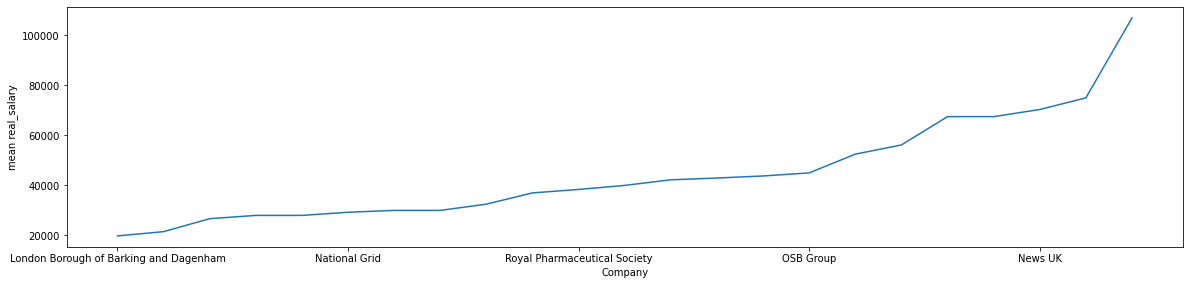

In [18]:
show_mean(jobs, 'Company')

*Showing the median salary per Comapany as a range*



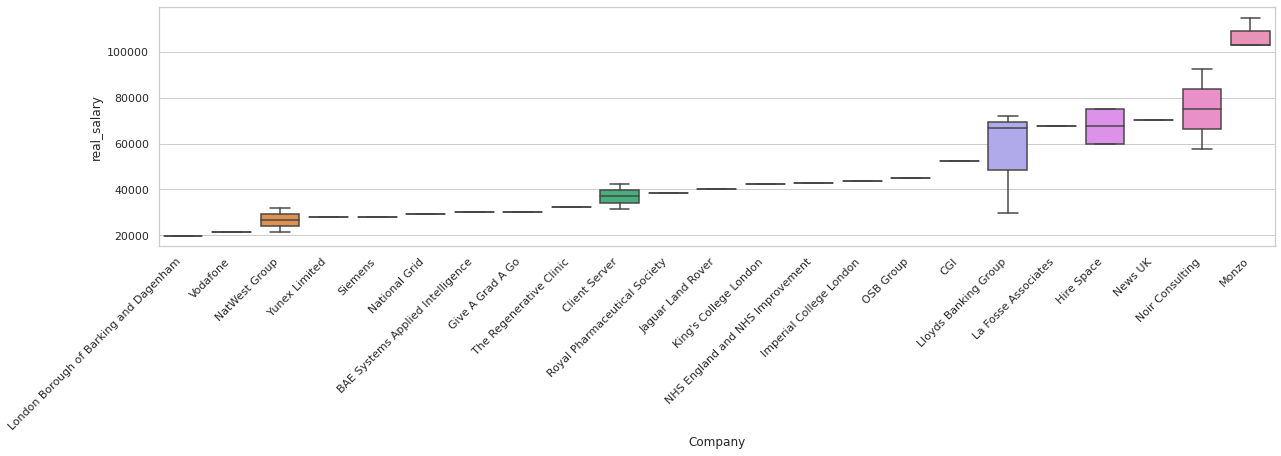

In [19]:
show_median(jobs, 'Company')

See what is the range of salary based on the Job Title

*Showing the mean salary per job Title*

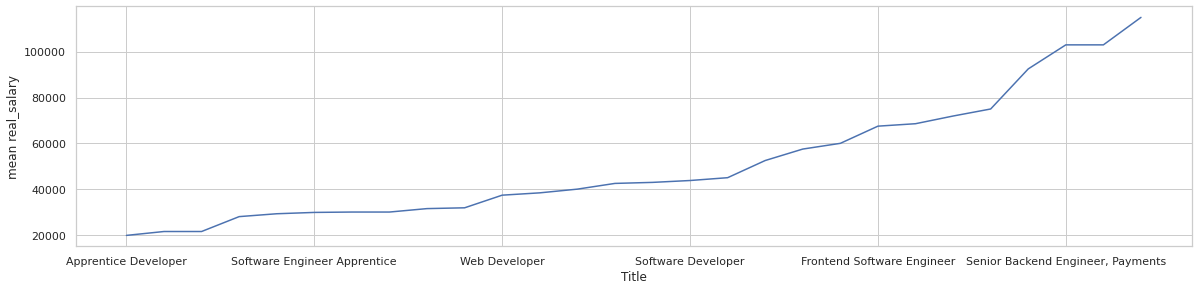

In [20]:
show_mean(jobs, 'Title')


*Showing the median salary per job Title* - @ TODO Normalise job titles

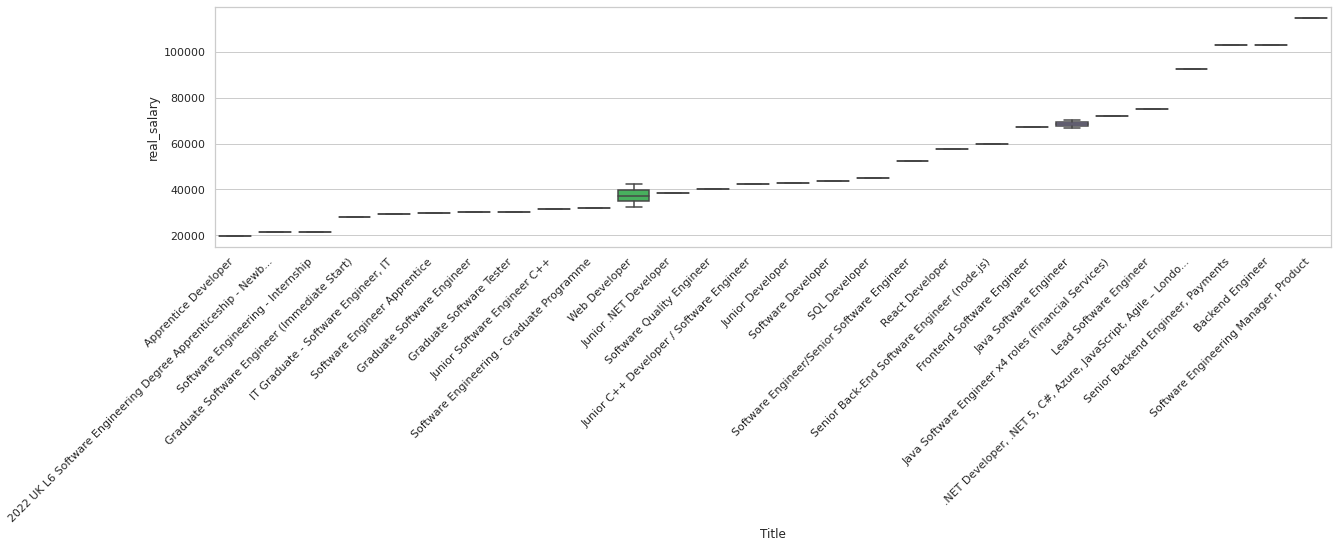

In [21]:
show_median(jobs, 'Title')

*Showing the median salary per job Title*

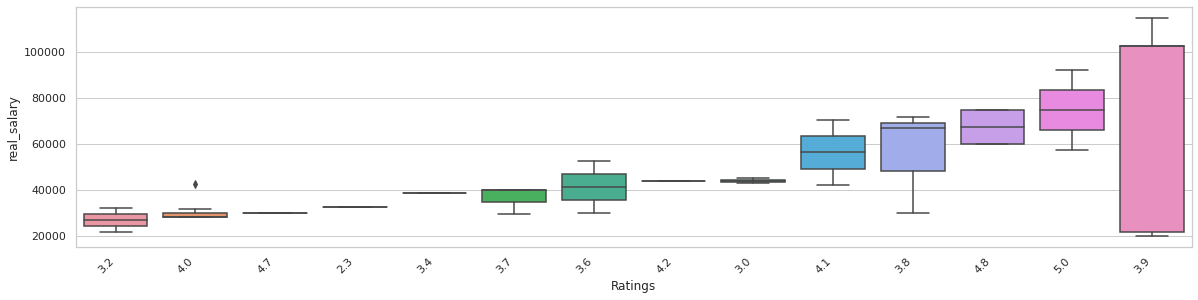

In [22]:
show_median(jobs, 'Ratings')

See correlation between Ratings and Salaries

In [23]:
print("Correlation between Salary and Ratings", jobs['real_salary'].corr(jobs['Ratings']))
jobs.corr()

Correlation between Salary and Ratings 0.3592678555685786


,Ratings,real_salary
Ratings,1.000000,0.359268
real_salary,0.359268,1.000000


## Summarize the target variable

Since our target variable is salary we want to see the density of our data and the range of salaries that we have

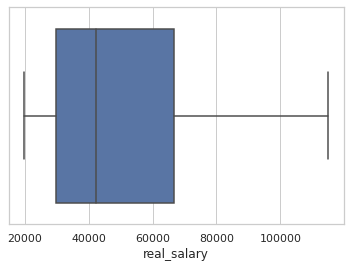

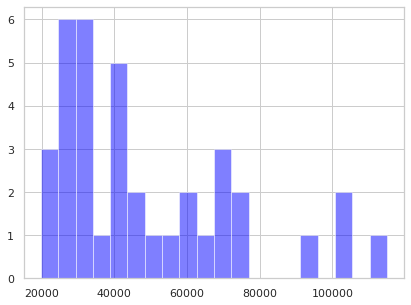

In [24]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=jobs["real_salary"])

plt.figure(figsize=(15,5))
salary=jobs['real_salary']
plt.subplot(1,2,1)
num_bins=20
n, bins, patches=plt.hist(salary, num_bins, facecolor='blue', alpha=0.5)

Plot distribution graph with the mean and a median values

@TODO
- Further NLP
- Word2Vec
- Preprocess for Neural model
- neural model
- training
- evaluation